In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Preprocessing
This section will cover showing an example image. Convert images into 4D tensors and saving them into .npz files.

Please proceed to Analyze section directly to load from .npz files

In [ ]:
# import some useful preprocessing packages
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, cv2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# define our main path
#path = "/content/drive/My Drive/Spring Deep Learning Class material /Group Project /Train1/"
path = "/content/drive/My Drive/Deep Learning Final Project/"

In [ ]:
# Loading all the images in a single go is failing and hence the data is split into three parts
#First 3000 images are put into part1, next 3000 into part2 & the last 2076 in part
part1 = path +'Data/Part1/'
part2 = path +'Data/Part2/'
part3 = path +'Data/Part3/'
part4 = path +'Data/Part4/'

In [ ]:
# Re-scale, load and transform images to 4D tensor
img_path = part1 + 'Hand_0000002.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# scaling the tensor to have values between 0 & 1
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


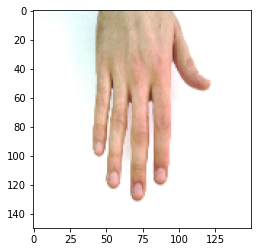

In [ ]:
# Image after scaling
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
# rescale all images and save them in a matrix 
from keras.preprocessing import image
import numpy as np
count = 0
part1_images = []
for image_path in sorted(os.listdir(part1)):
   img_path = part1 + image_path
   img = image.load_img(img_path, target_size=(150, 150))
   img_tensor = image.img_to_array(img) 
   img_tensor /= 255.
   part1_images.append(img_tensor)
   count = count +1
# Its shape is (1, 150, 150, 3)
   print(count)
part1_data = np.array(part1_images)

In [ ]:
part1_data.shape

(3000, 150, 150, 3)

In [ ]:
# Then we do same step for part2
count = 0
part2_images = []
for image_path in sorted(os.listdir(part2)):
   img_path = part2 + image_path
   img = image.load_img(img_path, target_size=(150, 150))
   img_tensor = image.img_to_array(img) 
   img_tensor /= 255.
   part2_images.append(img_tensor)
   count = count +1
   print(count)
part2_data = np.array(part2_images)

In [ ]:
part2_data.shape

(3000, 150, 150, 3)

In [ ]:
# Repeating the above step for part3 & part4
count = 0
part3_images = []
for image_path in sorted(os.listdir(part3)):
   img_path = part3 + image_path
   img = image.load_img(img_path, target_size=(150, 150))
   img_tensor = image.img_to_array(img) 
   img_tensor /= 255.
   part3_images.append(img_tensor)
   count = count +1
   print(count)
part3_data = np.array(part3_images)

count = 0
part4_images = []
for image_path in sorted(os.listdir(part4)):
   img_path = part4 + image_path
   img = image.load_img(img_path, target_size=(150, 150))
   img_tensor = image.img_to_array(img) 
   img_tensor /= 255.
   part4_images.append(img_tensor)
   count = count +1
   print(count)
part4_data = np.array(part4_images)

In [ ]:
print(part3_data.shape)
print(part4_data.shape)

(3000, 150, 150, 3)
(2076, 150, 150, 3)


In [ ]:
# save train dataset to npz file 
from numpy import savez_compressed
savez_compressed(path+'Data/part1_data.npz', part1_data)
savez_compressed(path+'Data/part2_data.npz', part2_data)
savez_compressed(path+'Data/part3_data.npz', part3_data)
savez_compressed(path+'Data/part4_data.npz', part4_data)

# Analyze


In [ ]:
# Loading the data back from .npz files 
from numpy import load
part1_data = load(path+'Data/part1_data.npz')
part2_data = load(path+'Data/part2_data.npz')
part3_data = load(path+'Data/part3_data.npz')
part4_data = load(path+'Data/part4_data.npz')

x_part1 = part1_data['arr_0']
x_part2 = part2_data['arr_0']
x_part3 = part3_data['arr_0']
x_part4 = part4_data['arr_0']

In [ ]:
# Checking the shape of image tensors data
print(x_part1.shape)
print(x_part2.shape)
print(x_part3.shape)
print(x_part4.shape)

(3000, 150, 150, 3)
(3000, 150, 150, 3)
(3000, 150, 150, 3)
(2076, 150, 150, 3)


In [ ]:
# --combining all the parts into a single dataset
part12= np.concatenate((x_part1,x_part2),axis=0)
part34= np.concatenate((x_part3,x_part4),axis=0)

X = np.concatenate((part12,part34),axis=0)

#-- Deleting the part datasets to reduce the load
del x_part1, x_part2, x_part3, x_part4, part12,part34

In [ ]:
# -- Loading metadata variables (includes target variable) from a csv
target_data = pd.read_csv(path+"Data/HandInfo.csv")
target_data.head()

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0


In [ ]:
#-- Changing skincolor to a ordinal variable
target_data['skin'] = target_data['skinColor']
size_mapping = {
    'dark': 0,
    'medium': 1,
    'fair': 2,
    'very fair':3}
target_data['skin'] = target_data['skin'].map(size_mapping)
target_data.head()

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities,skin
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0,2
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0,2
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0,2
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0,2
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0,2


In [ ]:
#--Changing gender variable to a binary flag
target_data['Gen'] = target_data['gender']
size_mapping = {
    'male': 1,
    'female': 0 }
target_data['Gen'] = target_data['Gen'].map(size_mapping)
target_data.head()

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities,Gen
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0,1
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0,1
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0,1
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0,1
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0,1


In [ ]:
# -- Flagging dorsal side images as 0 and palmar side images as 1 
target_data['dorsalOrpalmar'] = target_data['aspectOfHand']
size_mapping = {
    'dorsal left': 0,
    'dorsal right': 0,
    'palmar left': 1,
    'palmar right':1}
target_data['dorsalOrpalmar'] = target_data['dorsalOrpalmar'].map(size_mapping)
target_data.head()

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities,skin,Gen,dorsalOrpalmar
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0,2,1,0
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0,2,1,0
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0,2,1,0
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0,2,1,0
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0,2,1,0


In [ ]:
# -- Flagging left hand images as 0 and right hand images as 1 
target_data['LeftAndRight'] = target_data['aspectOfHand']
size_mapping = {
    'dorsal left': 0,
    'dorsal right': 1,
    'palmar left': 0,
    'palmar right':1}
target_data['LeftAndRight'] = target_data['LeftAndRight'].map(size_mapping)
target_data.head()

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities,skin,Gen,dorsalOrpalmar,LeftAndRight
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0,2,1,0,1
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0,2,1,0,1
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0,2,1,0,1
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0,2,1,0,1
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0,2,1,0,1


# Exploratory Data Analysis

In [ ]:
# Table showing the number of observations with different skin colors
target_data.groupby("skinColor")['id'].count()

skinColor
dark          758
fair         3493
medium       6495
very fair     330
Name: id, dtype: int64

Text(0, 0.5, 'No of images')

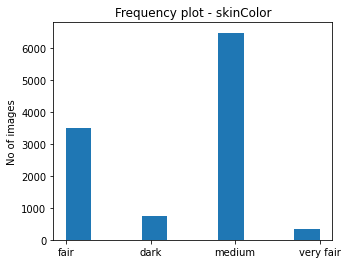

In [ ]:
# Plot showing distribution across skin color categories
plt.figure(figsize=(5,4))
plt.hist(target_data.skinColor)
plt.title('Frequency plot - skinColor')
plt.ylabel('No of images')

Text(0, 0.5, 'Density')

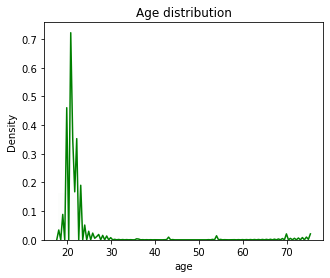

In [ ]:
# Frequency distribution across age
plt.figure(figsize=(5,4))
sns.distplot(target_data.age,color='g',bins=10,hist_kws={'alpha':0.01})
plt.title('Age distribution')
plt.ylabel('Density')

In [ ]:
# Table showing the number of observations across dorsal/palmar by left/right categories
target_data.groupby("aspectOfHand")['id'].count()

aspectOfHand
dorsal left     2788
dorsal right    2892
palmar left     2583
palmar right    2813
Name: id, dtype: int64

Text(0, 0.5, 'No of images')

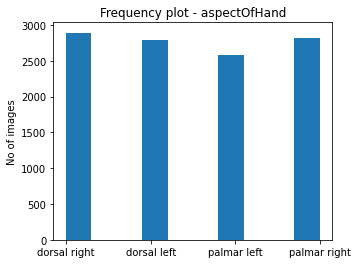

In [ ]:
# plot for the above data
plt.figure(figsize=(5,4))
plt.hist(target_data.aspectOfHand)
plt.title('Frequency plot - aspectOfHand')
plt.ylabel('No of images')

[]

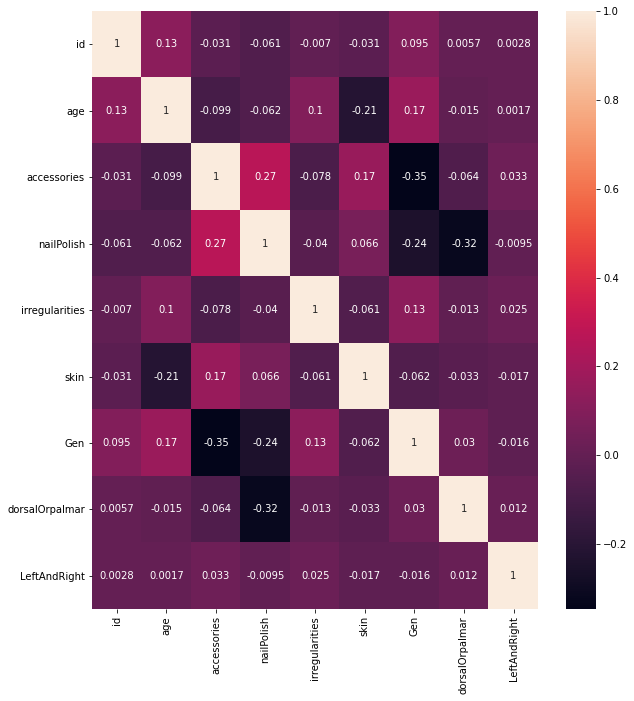

In [ ]:
# plotting correlation between all the variables in target dataset to understand if one variable helps understand others
import seaborn as sns
plt.figure(figsize=(10,11))
sns.heatmap(target_data.corr(),annot=True)
plt.plot()

In [ ]:
y = target_data['Gen']

In [ ]:
#Splitting the data into train, val & test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 125)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state= 125)
print(X_train.shape,X_val.shape,X_test.shape)
print(y_train.shape,y_val.shape,y_test.shape)

(6645, 150, 150, 3) (2215, 150, 150, 3) (2216, 150, 150, 3)
(6645,) (2215,) (2216,)


In [ ]:
# Importing packages necessary to build a convolution neural network model
import os, cv2
# import the necessary packages -- cnn_regression
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from numpy.random import seed
from numpy import savez_compressed
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(10)
tf.random.set_seed(10)

In [ ]:
# Here is the final chosen model architecture with 4 convolution layers with 2D kernels and 3 dense layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(150,150,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='sgd',loss="binary_crossentropy", metrics=['acc'])

In [ ]:
# defining earlystopping to stop the model if validation loss doesnot reduce for 15 consequent iterations
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=15, 
                   verbose=1)

In [ ]:
# fitting the model and chosing to update the weights once for every 25 observations
print("[INFO] training model...")
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=25, verbose=1,callbacks=[es])

[INFO] training model...
Epoch 1/500
266/266 [==============================] - 5s 18ms/step - loss: 0.6461 - acc: 0.6376 - val_loss: 0.6284 - val_acc: 0.6397
Epoch 2/500
266/266 [==============================] - 4s 17ms/step - loss: 0.6024 - acc: 0.6840 - val_loss: 0.5282 - val_acc: 0.7819
Epoch 3/500
266/266 [==============================] - 4s 17ms/step - loss: 0.5264 - acc: 0.7533 - val_loss: 0.4532 - val_acc: 0.7968
Epoch 4/500
266/266 [==============================] - 4s 17ms/step - loss: 0.4705 - acc: 0.7886 - val_loss: 0.4192 - val_acc: 0.8257
Epoch 5/500
266/266 [==============================] - 4s 17ms/step - loss: 0.4397 - acc: 0.8063 - val_loss: 0.3820 - val_acc: 0.8239
Epoch 6/500
266/266 [==============================] - 4s 17ms/step - loss: 0.4134 - acc: 0.8147 - val_loss: 0.3530 - val_acc: 0.8420
Epoch 7/500
266/266 [==============================] - 4s 17ms/step - loss: 0.3813 - acc: 0.8339 - val_loss: 0.3328 - val_acc: 0.8551
Epoch 8/500
266/266 [================

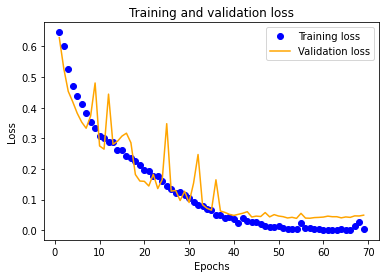

In [ ]:
# Plotting train & validation losses against iterations to identify the ideal number of epochs/iterations
history_dict = history.history
loss_values = history_dict['loss'] # Extracting training set loss from model object
val_loss_values = history_dict['val_loss'] # Extracting validation set loss from model object
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Extracting epoch value where the val_loss was minimum from history.history
ep=pd.DataFrame(history.epoch,columns=["epoch"])
vl=pd.DataFrame(history.history['val_loss'],columns=["val_loss"])
x=pd.concat([ep+1,vl],axis=1)
best_epoch=x.epoch[x.val_loss==min(x.val_loss)]
print("We should re-run for this many epochs: ", best_epoch.values[0]) # getting the earliest epoch value when the val_loss hit the global bottom

We should re-run for this many epochs:  54


In [ ]:
#-- Saving the model
model.save(path+"ConvNet_11k_Hands_Model.h5")

In [ ]:
# -- generating the confusion matrix for validation set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_val, verbose=0) # This step makes it specific to validation set
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1403   14]
 [  15  783]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1417
           1       0.98      0.98      0.98       798

    accuracy                           0.99      2215
   macro avg       0.99      0.99      0.99      2215
weighted avg       0.99      0.99      0.99      2215



In [ ]:
# -- generating the confusion matrix for test set
y_pred = model.predict_classes(X_test, verbose=0)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1429   13]
 [  15  759]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1442
           1       0.98      0.98      0.98       774

    accuracy                           0.99      2216
   macro avg       0.99      0.99      0.99      2216
weighted avg       0.99      0.99      0.99      2216



(0.0, 2.0, 2.0, 0.0)

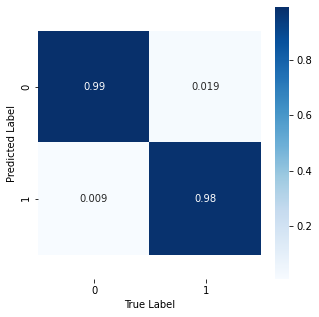

In [ ]:
# Plotting the confusion matrix of test dataset showing recall values as data labels
import seaborn as sns
fig, axes = plt.subplots(figsize=(5,5))
cm = confusion_matrix(y_test, y_pred).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

# Visualizing the model layers


In [ ]:
# Importing saved model 
from tensorflow.keras.models import load_model
model = load_model(path+"ConvNet_11k_Hands_Model.h5") 
model.summary()  # Printing model summary to check if the model architecture is as expected

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      416       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 128)       32896     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 256)      

In [ ]:
# Model layers to be demonstrated using one sample image
img_path = part1 + 'Hand_0000004.jpg'

# preprocess the sample image into a 4D tensor
from keras.preprocessing import image

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


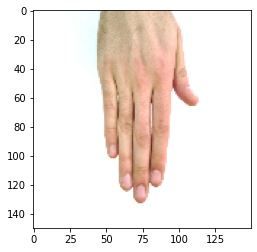

In [ ]:
# Showing the sample image 
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
# Extracting outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]

# Creating a model that will return these outputs, given the model input:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
# Passing the 4D tensor of sample image chosen to the model to generate convolution layers 
activations = activation_model.predict(img_tensor)

In [ ]:
# subsetting for the first convolution layer
first_layer_activation = activations[0]
print(first_layer_activation.shape) # shows the tensor shape and number of channels

(1, 150, 150, 32)


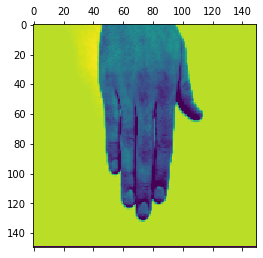

In [ ]:
# Plotting one channel out of 32 in the first layer of chosen model.
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


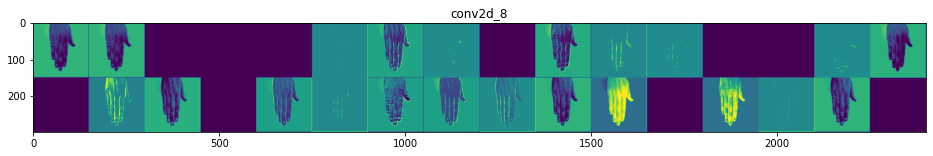

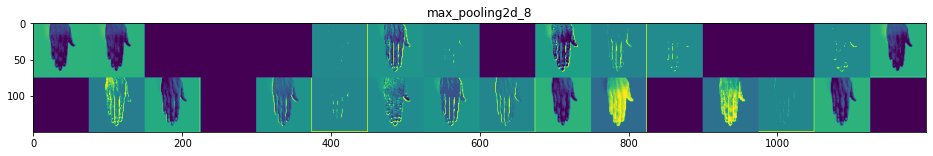

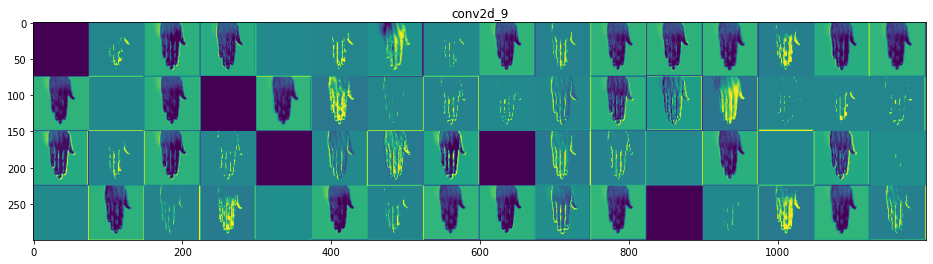

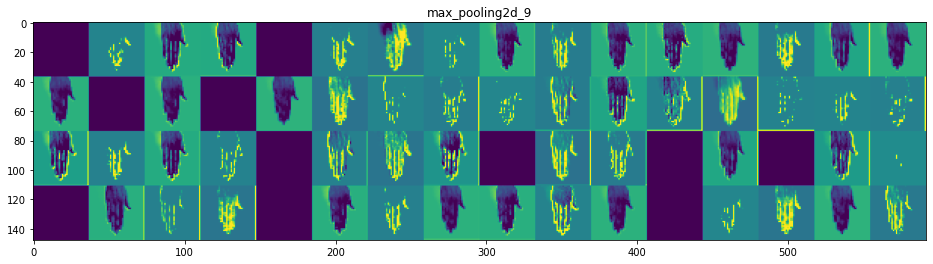

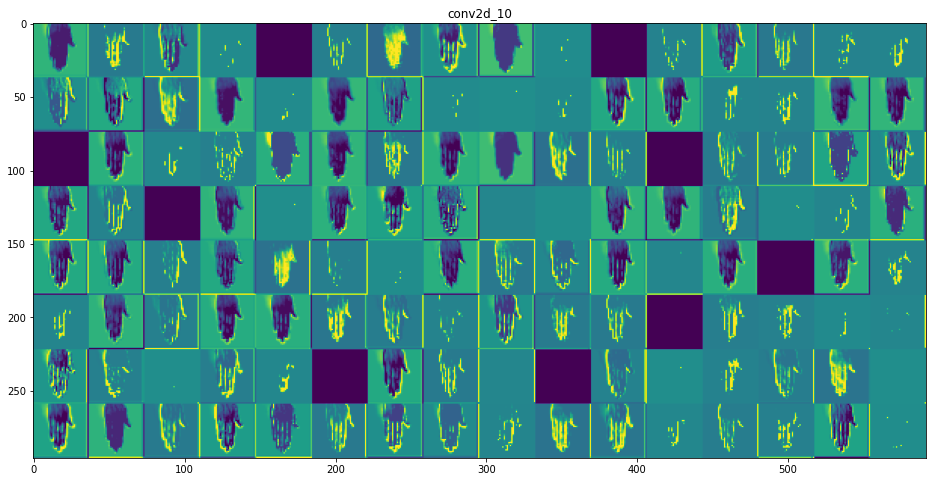

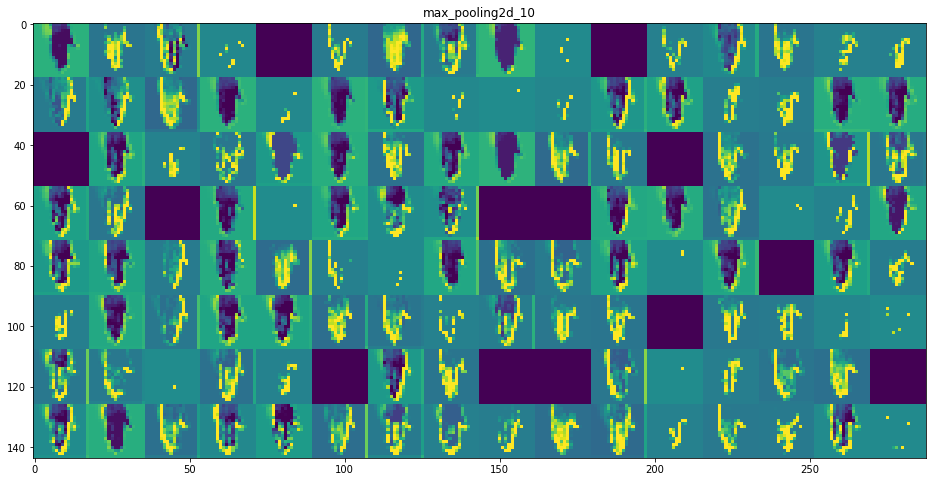

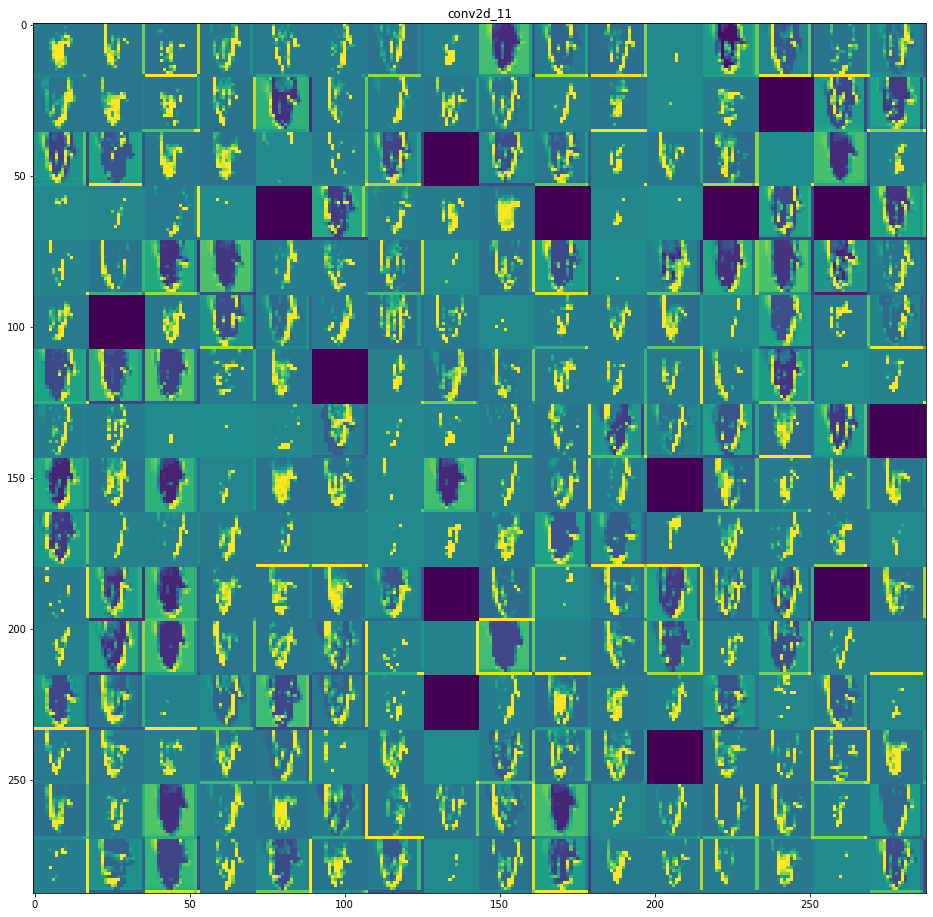

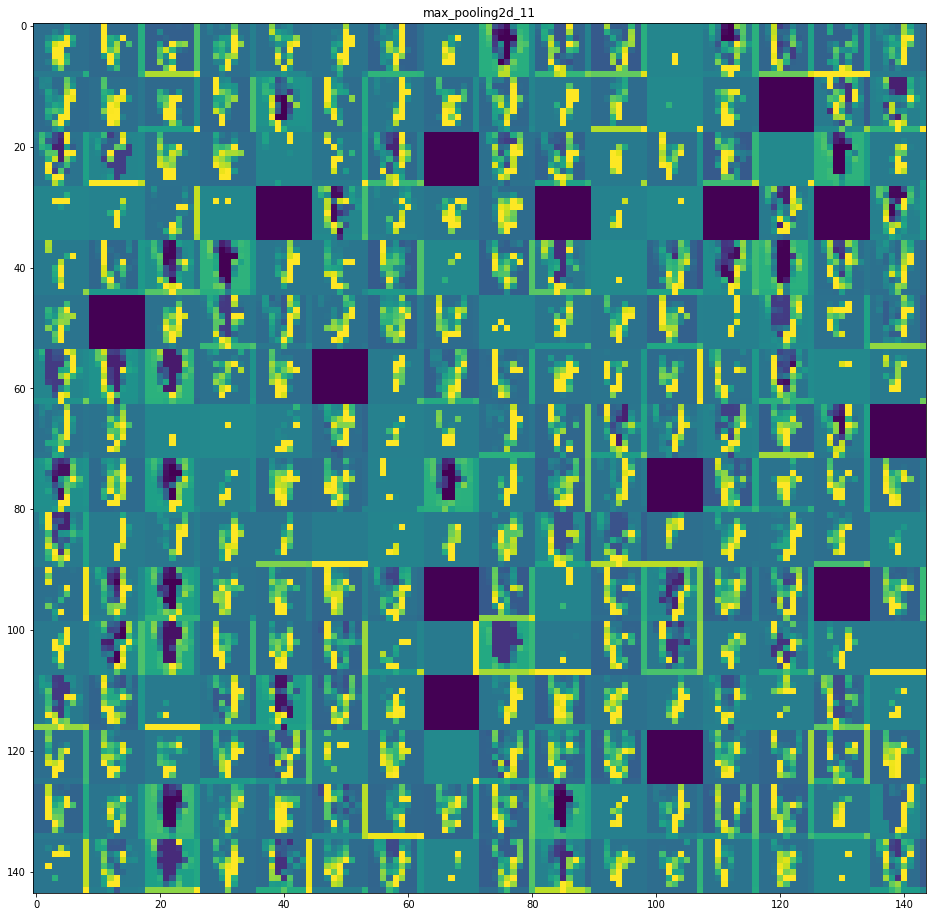

In [ ]:
# -- To show all channels in all 8 layers

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16 # Deciding the number of channels to show in a row

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

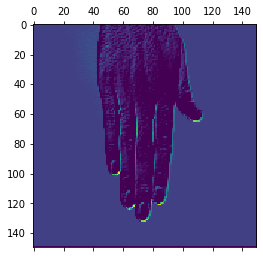

In [ ]:
# Plotting channel 10 from the first layer
plt.matshow(first_layer_activation[0, :, :, 9], cmap='viridis')
plt.show()

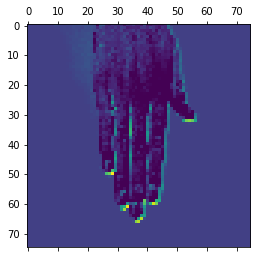

In [ ]:
# Plotting channel 10 from the second layer
plt.matshow(activations[1][0, :, :, 9], cmap='viridis')
plt.show()